<b> Select an image dataset, e.g. the MNIST handwritten digits, and compute the principal components. Show that the individual images can be approximated by the sum of the first k principal components. </b>

Principal Component Analysis, or PCA for short is a method for reducing the dimensionality of data. It can be thought of as a projection method where data with m-columns (features) is projected into a subspace with m or fewer columns, whilst retaining the essence of the original data. 

PCA is an operation applied to a dataset, represented by an n x m matrix A that results in a projection of A which we can call B.

Let A = [[a11, a12], [a21, a22], [a31, a32]]
B = PCA(A)

The first step in calculating PCA is to calculate the mean of matrix A.
M = mean(A)

Next we center the values in each column by subtracting the mean column value.

C = A - M

Next is to calculate the covariance matrix of the centered matrix C

A covariance matrix is a alculation of covariance of aa given matrix with covariance scores for every column with every other column, including itself.

V = cov(C)

Finally we calcuate the eigendecomposition of the covariance matrix V. This results in a list of eigenvalues and a list of eigenvectors.

values, vectors = eig(V)

The eigenvectors represente the directions or components for the reduced subspace of B, whereas the eigenvalues represented the magnitudes for the direction.

A total of m or less components must be selected to comprise the chosen subspace. Ideally, we would select k eigenvectors, called principal components, that have the k largest eigenvalues.

B = select(values, vectors)


In [76]:
import matplotlib.pyplot as plt
import numpy as np

In [77]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data', one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [78]:
images = mnist.train.images
print(images.shape)

(55000, 784)


In [79]:
images = np.reshape(images, (-1, 28, 28))

In [80]:
print(images.shape)

(55000, 28, 28)


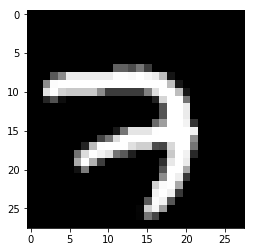

In [81]:
plt.imshow(images[0], cmap='gray')
plt.show()

In [129]:
def principalComponent(image, num_pc=0):
    mean_matrix = (image - np.mean(image.T, axis=1)).T # Subtracting the mean along the column
    cov_matrix = np.cov(mean_matrix) # Covariance Matrix
    values, vectors = np.linalg.eig(cov_matrix)
    max_num_pc = np.size(vectors, axis=1)
    #Sorting the eigenvalues in ascending order
    idx = np.argsort(values)
    idx = idx[::-1]
    values = values[idx]
    #Sorting Eigenvectors according to the sorted eigenvalues
    vectors = vectors[:, idx]
    if num_pc < max_num_pc and num_pc >= 0:
        vectors = vectors[:, range(num_pc)]
    proj = np.dot(vectors.T, mean_matrix) #Projecton
    return values, vectors, proj
    

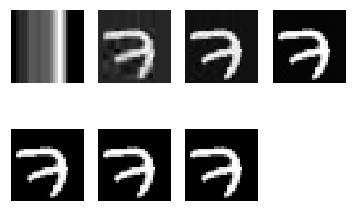

In [130]:
image = images[0]
full_pc = np.size(image, axis=1)
i = 1
for num_pc in range(0, full_pc+5, 5):
    values, vectors, proj = principalComponent(image, num_pc)
    image_reconstructed = np.dot(vectors, proj).T + np.mean(image, axis=0)
    #Showing the pics reconstructed with less than 30 PCs
    if num_pc <= 30:
        ax = plt.subplot(2, 4, i, frame_on=False)
        i += 1
        plt.imshow(image_reconstructed, cmap='gray')
        plt.grid(False)
        plt.xticks([])
        plt.yticks([])
plt.show()
        

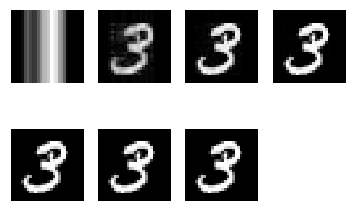

In [131]:
image = images[1]
full_pc = np.size(image, axis=1)
i = 1
for num_pc in range(0, full_pc+5, 5):
    values, vectors, proj = principalComponent(image, num_pc)
    #print(vectors)
    image_reconstructed = np.dot(vectors, proj).T + np.mean(image, axis=0)
    #Showing the pics reconstructed with less than 30 PCs
    if num_pc <= 30:
        ax = plt.subplot(2, 4, i, frame_on=False)
        i += 1
        plt.imshow(abs(image_reconstructed), cmap='gray')
        plt.grid(False)
        plt.xticks([])
        plt.yticks([])
plt.show()

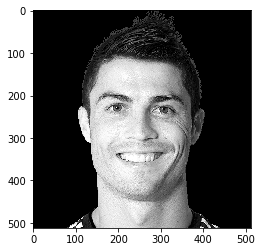

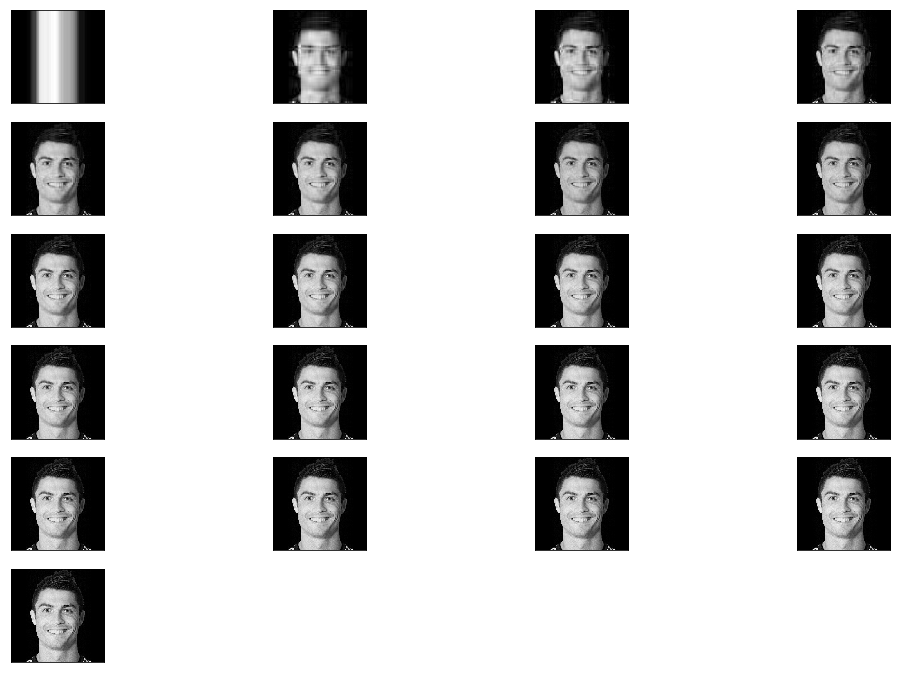

In [123]:
image = plt.imread('face.png')
image = image[:,:,0]
plt.imshow(image, cmap='gray')
plt.show()
full_pc = np.size(image, axis=1)
i = 1
fig = plt.figure(figsize=(18,12))
for num_pc in range(0, full_pc+5, 5):
    values, vectors, proj = principalComponent(image, num_pc)
    image_reconstructed = np.dot(vectors, proj).T + np.mean(image, axis=0)
    if num_pc <= 100:
        plt.subplot(6, 4, i)
        i += 1
        plt.imshow(abs(image_reconstructed), cmap='gray')
        plt.grid(False)
        plt.xticks([])
        plt.yticks([])
plt.show()

From the above examples we can see that an image can be reconstructed from approximating the sum of first k principal components.

### 2)

I have shown how PCA can be used for a variety of tasks. I have used the scikit-learn's implementation of PCA

In [132]:
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA

In [135]:
digits = load_digits()
print(digits.data.shape)

(1797, 64)


In [138]:
pca = PCA(2) #Project the data from 64 to 2 components
projected = pca.fit_transform(digits.data)
print(projected.shape)

(1797, 2)


I will now plot the two principal components. We have found the optimal stretch and rotation in 64-dimensional space that allows us to see the layout of the digits in two dimensions.

/usr/local/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: The spectral and spectral_r colormap was deprecated in version 2.0. Use nipy_spectral and nipy_spectral_r instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


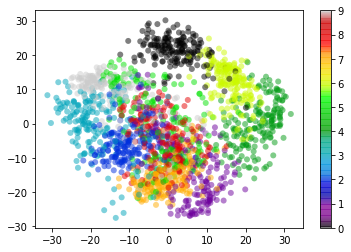

In [142]:
plt.scatter(projected[:, 0], projected[:, 1], c=digits.target, edgecolor='none',
            alpha=0.5, cmap='spectral')
plt.colorbar()
plt.show()

<b> What do the components mean? </b>

Each image is defined by a collection of 64 pixel values.
x = [$x_{1}$, $x_{2}$, $x_{3}$, .... $x_{64}$]

To construct the image we multiply each element of the vector by the pixel it describes and then add the results together to build the image.

So to reduce the dimension of this data is to zero out all but few of these basis vectors.
Pixel bias is not the only bias function that can be used, we can use PCA. PCA can be thought of as a process of choosing optimal basis functions, such that adding together just the first few of them is enough to suitably reconstruct the buld of the elements in the dataset.

### PCA for Eigenfaces dataset





In [143]:
from sklearn.datasets import fetch_lfw_people

In [145]:
faces = fetch_lfw_people(min_faces_per_person=20)
print(faces.target_names)

['Alejandro Toledo' 'Alvaro Uribe' 'Amelie Mauresmo' 'Andre Agassi'
 'Angelina Jolie' 'Ariel Sharon' 'Arnold Schwarzenegger'
 'Atal Bihari Vajpayee' 'Bill Clinton' 'Carlos Menem' 'Colin Powell'
 'David Beckham' 'Donald Rumsfeld' 'George Robertson' 'George W Bush'
 'Gerhard Schroeder' 'Gloria Macapagal Arroyo' 'Gray Davis'
 'Guillermo Coria' 'Hamid Karzai' 'Hans Blix' 'Hugo Chavez' 'Igor Ivanov'
 'Jack Straw' 'Jacques Chirac' 'Jean Chretien' 'Jennifer Aniston'
 'Jennifer Capriati' 'Jennifer Lopez' 'Jeremy Greenstock' 'Jiang Zemin'
 'John Ashcroft' 'John Negroponte' 'Jose Maria Aznar' 'Juan Carlos Ferrero'
 'Junichiro Koizumi' 'Kofi Annan' 'Laura Bush' 'Lindsay Davenport'
 'Lleyton Hewitt' 'Luiz Inacio Lula da Silva' 'Mahmoud Abbas'
 'Megawati Sukarnoputri' 'Michael Bloomberg' 'Naomi Watts'
 'Nestor Kirchner' 'Paul Bremer' 'Pete Sampras' 'Recep Tayyip Erdogan'
 'Ricardo Lagos' 'Roh Moo-hyun' 'Rudolph Giuliani' 'Saddam Hussein'
 'Serena Williams' 'Silvio Berlusconi' 'Tiger Woods' 'Tom Das

In [146]:
pca = PCA(150)
pca.fit(faces.data)

PCA(copy=True, iterated_power='auto', n_components=150, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

Visualization of first several principal components (these components are know as eigenvectors, or in this case it is known as eigenfaces)

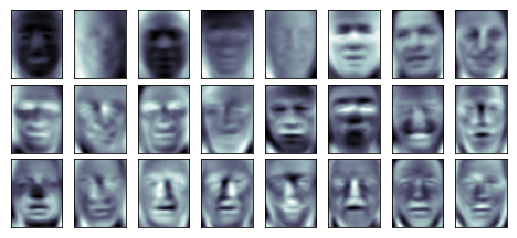

In [151]:
fig, axes = plt.subplots(3, 8, figsize=(9, 4),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))
#print(axes.flat)
for i, ax in enumerate(axes.flat):
    ax.imshow(pca.components_[i].reshape(62, 47), cmap='bone')
    #print(i)
plt.show()    

Now let us reconstruct the faces with these 150 components and compare them to the input image.

In [152]:
components = pca.transform(faces.data)
projected = pca.inverse_transform(components)

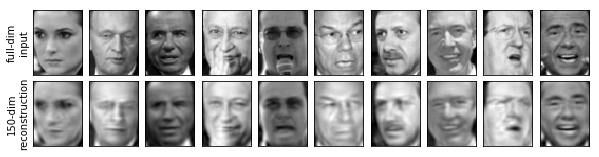

In [153]:
# Plot the results
fig, ax = plt.subplots(2, 10, figsize=(10, 2.5),
                       subplot_kw={'xticks':[], 'yticks':[]},
                       gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i in range(10):
    ax[0, i].imshow(faces.data[i].reshape(62, 47), cmap='binary_r')
    ax[1, i].imshow(projected[i].reshape(62, 47), cmap='binary_r')
    
ax[0, 0].set_ylabel('full-dim\ninput')
ax[1, 0].set_ylabel('150-dim\nreconstruction');
plt.show()

As you can see the faces are well reconstructed and acn be made out by human eye. But it is not as clear as the original images. Below I have increased the number of components so as to make the images more clearer.

In [158]:
pca = PCA(250)
pca.fit(faces.data)

PCA(copy=True, iterated_power='auto', n_components=250, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [159]:
components = pca.transform(faces.data)
projected = pca.inverse_transform(components)

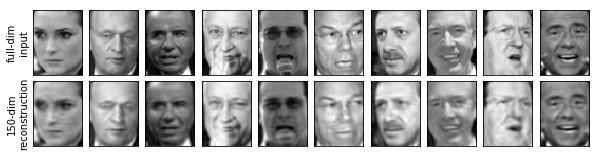

In [160]:
# Plot the results
fig, ax = plt.subplots(2, 10, figsize=(10, 2.5),
                       subplot_kw={'xticks':[], 'yticks':[]},
                       gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i in range(10):
    ax[0, i].imshow(faces.data[i].reshape(62, 47), cmap='binary_r')
    ax[1, i].imshow(projected[i].reshape(62, 47), cmap='binary_r')
    
ax[0, 0].set_ylabel('full-dim\ninput')
ax[1, 0].set_ylabel('150-dim\nreconstruction');
plt.show()

Now you can see that by keep 250 components the faces look almost similar to the real input.